# Matplotlib

Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python: 

- Darstellung von Daten in Publikationsqualität
- Erstellung interaktiver Abbildungen, die sich zoomen, schwenken und aktualisieren lassen. 
- Export der Darstellungen in verschiedene Dateiformate
- Einbettung der Figuren in GUIs
    
Matplotlib muss - genau wie Numpy - mit dem import Befehl importiert werden. 
Für die Erstellung einfacher Grafiken nutzt man das **pyplot Interface**, mit welchem eine MATLAB-ähnliche Art des Plottens möglich ist. Über das **pyplot Interface** lassen sich Figuren öffnen und deren Inhalte bearbeiten.

Es gibt grundsätzlich **zwei Ansätze, um Diagramme mit matplotlib zu erstellen**: 

- Nicht objekt-orientierter Ansatz über das funktionale Interface 
- Objekt-orientierter Ansatz über das objekt-orientierte Interface

Im Folgenden werden beide Ansätze vorgestellt, wobei dann im Laufe der kommenden Vorlesungen nur noch mit dem OOP Ansatz gearbeitet wird, da dieser mehr Kontrolle und Anpassungsmöglichkeiten über die Plots bietet und daher der empfohlene Ansatz ist.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# Damit im Notebook die figure nicht nur als Bild sondern als interaktive Grafik dargestellt wird:
%matplotlib notebook
%matplotlib inline

## Erstes Beispiel nicht objekt-orientiert

### Daten für die Darstellung erzeugen

Möchte man Daten in einem Diagramm darstellen, so ist es essentiell, dass für jeden darzustellenden Wert auf der y-Achse ein zugehöriger Wert auf der x-Achse gegeben ist. Im Folgendne wird hierfür ein Zeitvektor t erzeugt, mit welchem ein Signalvektor berechnet wird. Dadurch ist automatisch sicher gesellt, dass beide Vektoren dieselbe Länge, also dieselbe Anzahl Elemente aufweisen. 

In [29]:
t = np.linspace(0, 1, 100)
s1 = np.sin(2*np.pi*t)
s2 = s1 + np.random.randn(*s1.shape)/4

### Diagramm erstellen

Beim nicht objekt-orientierten Ansatz werden über das **pyplot Interface** verschiedene Befehle aufgerufen, welche alle Änderungen an derselben **figure** vornehmen. <br>
Es handelt sich hierbei um eine zustandsbasiertes Schnittstelle, bei der der Zustand (die **Figure**) während der verschiedenen Funktionsaufrufe erhalten bleibt. Die Schnittstelle erlaubt es, Elemente hinzuzufügen und den Plot innerhalb derselben figure zu verändern. <br>
Die Schnittstelle weist viele Ähnlichkeiten zur MATLAB-Syntax auf. <br>
Dieser Ansatz bietet im Gegensatz zum objekt-orientierten Ansatz weniger Kontrolle und Anpassungsmöglichkeiten und ist daher nicht die empfohlene Art und Weise, um mit matplotlib Diagramme zu erstellen. 

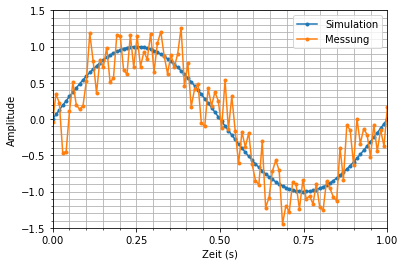

In [30]:
# Eine neue figure erzeugen
plt.figure();

# Plotte s1/s2 gegenüber t als Linie mit Punkten
plt.plot(t, s1, '.-', label='Simulation')
plt.plot(t, s2, '.-', label='Messung')

# Achsen beschriften
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')

# Achsen limiteren
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)
    
# Ticks verändern
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1,  1.5])

# Hilfslinien aktivieren
plt.grid(which='both')
plt.minorticks_on()

# Legende hinzufügen
plt.legend()

# Diagramm abspeichern
plt.savefig('diagramm_nOOP.pdf')

## Beispiel objekt-orientiert

Die Idee hinter Verwendung des objekt-orientierten Ansatzes besteht darin, Figuren- und Achsenobjekte zu erzeugen und dann über diese Objekte die entsprechenden Methoden und Attribute aufzurufen. 
Dieser Ansatz ist besonders gut für Situationen geeignet, in denen man mit mehreren Subplots gleichzeitig arbeiten muss. <br>
Beim objekt-orientierten Ansatz wird über das **pyplot Interface** ein figure-Objekt sowie (ein oder mehrere) axes-objekte erzeugt. Die meisten für die Darstellung verwendeten Methoden werden dann über die axes-objekte aufgerufen. 

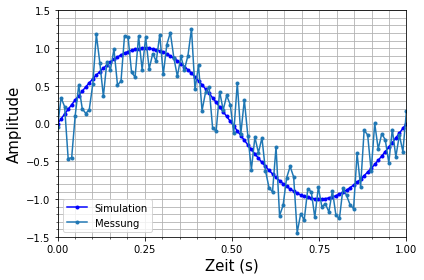

In [31]:
# Erzeuge eine figure und ein Set von subplots
# Achtung: Die neuste matplotlib-Version empfiehlt layout="tight" bzw. layout="constrained": 
# https://matplotlib.org/3.5.0/api/figure_api.html
fig, ax = plt.subplots(tight_layout=True)

# oder:
# fig = plt.figure(tight_layout=True)
# ax = fig.add_subplot()

# Signale plotten
ax.plot(t, s1, linestyle='-', marker='.', color="blue", label='Simulation')
ax.plot(t, s2, '.-', label='Messung')

# Achsen beschriften
ax.set_xlabel('Zeit (s)', fontsize=15)
ax.set_ylabel('Amplitude', fontsize=15)

# Achsen limitieren
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)

# Ticks verändern
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticks([-1.5, -1, -0.5, 0, 0.5, 1,  1.5])
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))

# Hilfslinien aktivieren
# plt.grid(b=True, which='major', color='b', linestyle='-')
# plt.grid(b=True, which='minor', color='r', linestyle='--')
ax.grid(which="both")
ax.minorticks_on()

# Legende hinzufügen
ax.legend(loc="lower left")

# Diagramm abspeichern
fig.savefig('diagramm_OOP_tight.pdf')

## Einfaches Beispiel OOP mit zwei subplots

In [32]:
s2 = s2/10

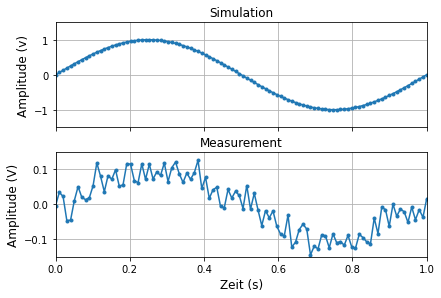

In [33]:
# Figure und axes objekte erzeugen
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, constrained_layout=True)

# Signale plotten
ax1.plot(t, s1, '.-')
ax2.plot(t, s2, '.-')

# Achsen beschriften
ax1.set_ylabel('Amplitude (v)', fontsize=12)
ax2.set_xlabel('Zeit (s)', fontsize=12)
ax2.set_ylabel('Amplitude (V)', fontsize=12)

# Achsen limitieren
ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(-1.5/10, 1.5/10)
ax1.set_xlim(0, 1)

# Subplots beschriften
ax1.set_title("Simulation")
ax2.set_title("Measurement")

# Hilfslinien aktivieren
ax1.grid(True)
ax2.grid(True)

# Diagramm abspeichern
fig.savefig('diagramm_subplots.pdf')

Bei mehreren Subplots auf beiden Achsen ist es sinnvoller die axes-objekte in einem numpy array zusammen gefasst entgegen zu nehmen (ohne unpacking wie oben) und dann über normale Indexierung auf die entsprechenden subplots zuzugreifen:

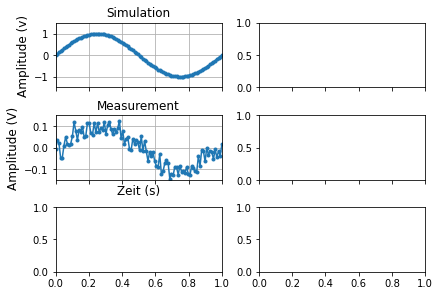

In [34]:
# Figure und axes objekte erzeugen
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, constrained_layout=True)

# Signale plotten
ax[0, 0].plot(t, s1, '.-', label='Simulation')
ax[1, 0].plot(t, s2, '.-', label='Simulation')

# Achsen beschriften
ax[0, 0].set_ylabel('Amplitude (v)', fontsize=12)
ax[1, 0].set_xlabel('Zeit (s)', fontsize=12)
ax[1, 0].set_ylabel('Amplitude (V)', fontsize=12)

# Achsen limitieren
ax[0, 0].set_ylim(-1.5, 1.5)
ax[1, 0].set_ylim(-1.5/10, 1.5/10)
ax[0, 0].set_xlim(0, 1)

# Subplots beschriften
ax[0, 0].set_title("Simulation")
ax[1, 0].set_title("Measurement")

# Hilfslinien aktivieren
ax[0, 0].grid(True)
ax[1, 0].grid(True)

Die fig.add_subplot() Methode kann ebenfalls verwendet werden, um verschiedene subplots zur figure hinzuzufügen. <br>
Vor allem dann, wenn man verschiedene Projektionen innerhalb einer figure verwenden möchte, ist es sehr sinnvoll mit dieser Methode zu arbeiten: 

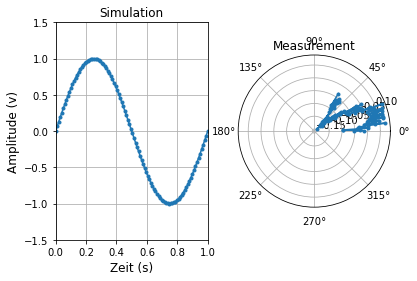

In [35]:
# Figure und axes-objekte erzeugen
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='polar')

# Signale plotten
ax1.plot(t, s1, '.-')
ax2.plot(t, s2, '.-')

# Achsen beschriften
ax1.set_xlabel('Zeit (s)', fontsize=12)
ax1.set_ylabel('Amplitude (v)', fontsize=12)

# Achsen limitieren
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(0, 1)

# Subplots beschriften
ax1.set_title("Simulation")
ax2.set_title("Measurement", y=1)

# Hilfslinien aktivieren
ax1.grid()

## Pyplot Funktionen

Je nach darzustellender Daten ist es sinnvoller diese mit logarithmisch skalierten Achsen darzustellen. <br>
Hierfür bietet das pyplot Interface entsprechende Funktionen:

### loglog()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html

In [36]:
f = np.logspace(-2, 1, 20)
s = np.exp(-f)

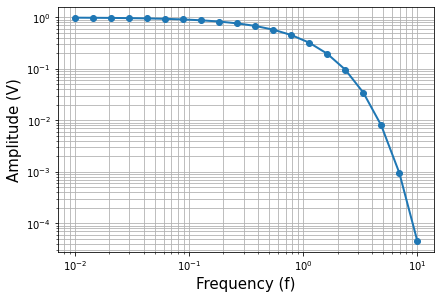

In [37]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.loglog(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both');

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_loglog.pdf')

### semilogx()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html

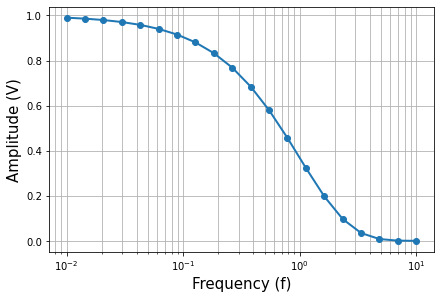

In [38]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.semilogx(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both')

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_semilogx.pdf')

### semilogy()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html

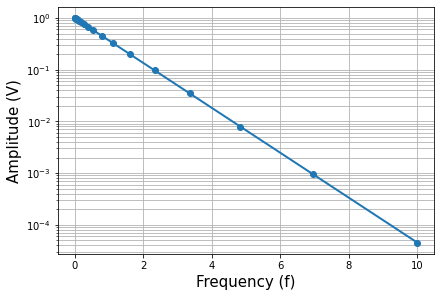

In [39]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.semilogy(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both')

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_semilogy.pdf')

### step()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html

Diese Funktion gestaltet die Darstellung so, dass sie eine horizontale Grundlinie hat, mit der die Datenpunkte durch vertikale Linien verbunden werden. Diese Art der Darstellung wird verwendet, um zu analysieren, an welchen Punkten die Änderung des Y-Achsenwerts in Bezug auf die X-Achse genau stattgefunden hat. Dies ist sehr nützlich bei der diskreten Analyse.

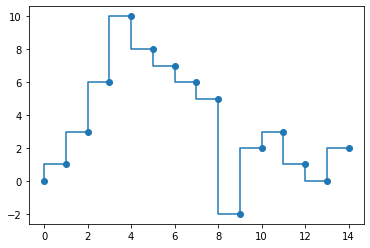

In [40]:
x = np.arange(15)
y = np.array([0, 1, 3, 6, 10, 8, 7, 6, 5, -2, 2, 3, 1, 0, 2])

fig, ax = plt.subplots()
ax.step(x, y, '-o', where='pre');

### hist()
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

Ein Histogramm ist eine Art Balkendiagramm, mit dem man eine Darstellung der Verteilung von numerischen Daten erhält. Um ein Histogramm zu erstellen, wird der Wertebereich zunächst in Bins eingeteilt - das heißt, der gesamte Wertebereich wird in eine Reihe von Intervallen unterteilt - und dann wird gezählt, wie viele Werte in jedes Intervall fallen. Die Bins werden normalerweise als aufeinanderfolgende, sich nicht überschneidende Intervalle einer Variablen angegeben. Die Methode hist( ) übernimmt diesen Zählvorgang sowie die Darstellung der Daten in den einzelnen Bins. Über die Funktionsparameter kann die Grösse der Bins verändert werden. Es gibt noch weitere Parameter, um die Darstellung der Daten im Histogramm anzupassen. 

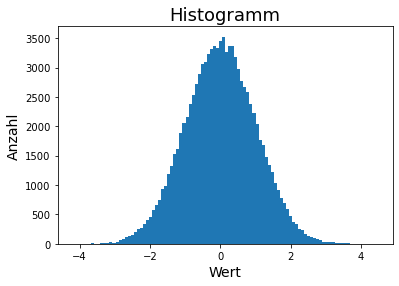

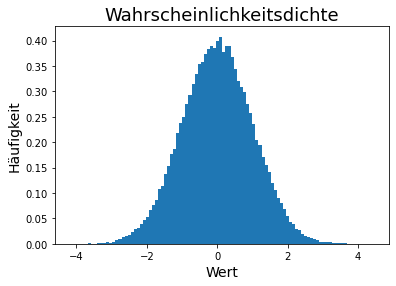

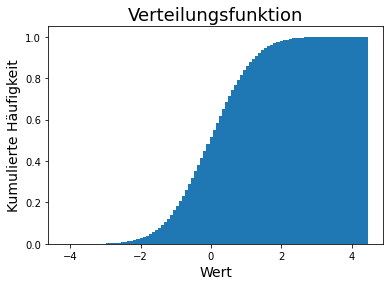

In [41]:
N = 100000
data = np.random.randn(N)

fig, ax = plt.subplots()
ax.hist(data, bins=100)
ax.set_title('Histogramm', fontsize=18)
ax.set_xlabel('Wert', fontsize=14)
ax.set_ylabel('Anzahl', fontsize=14);
plt.show()

fig, ax = plt.subplots()
ax.hist(data, bins=100, density = True)
ax.set_title('Wahrscheinlichkeitsdichte', fontsize=18)
ax.set_xlabel('Wert', fontsize=14)
ax.set_ylabel('Häufigkeit', fontsize=14);
plt.show()

fig, ax = plt.subplots()
ax.hist(data, bins=100, density = True, cumulative=True)
ax.set_title('Verteilungsfunktion', fontsize=18)
ax.set_xlabel('Wert', fontsize=14)
ax.set_ylabel('Kumulierte Häufigkeit', fontsize=14);
plt.show()

### scatter()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Mit Scatter Diagramme oder Streudiagrammen werden Messdaten als Datenpunkte auf einer horizontalen und vertikalen Achsen dargestellt. Sie sind dazu gedacht, um zu zeigen, wie stark eine Variable von einer anderen beeinflusst wird. Neben der Darstellung eines Datenpunkts in der X-Y Ebene kann eine dritte und vierte Variable so eingestellt werden, dass sie der Grösse bzw. der Farbe des entsprechenden Datenpunktes entspricht. Dadurch können dem Diagramm zwei weitere Dimensionen hinzugefügt werden.

#### Beispiel Körpergrössen

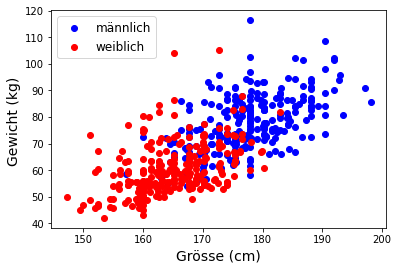

In [42]:
gewicht, groesse, geschlecht = np.loadtxt("body_dimensions_data.txt", usecols=(22,23,24), unpack=True)

maennlich = (geschlecht == 1)
weiblich = (geschlecht == 0)

fig, ax = plt.subplots()
ax.scatter(groesse[maennlich], gewicht[maennlich], color='b', label='männlich')
ax.scatter(groesse[weiblich], gewicht[weiblich], color='r', label='weiblich')
ax.set_xlabel('Grösse (cm)', fontsize=14)
ax.set_ylabel('Gewicht (kg) ', fontsize=14)
ax.legend(fontsize=12)

#### Beispiel Blütenblätter

In diesem Beispiel werden die Grössen der Kelchblätter (Sepalen) sowie Kronblätter (Petalen) verschiedener Schwertliliengattungen dargestellt. 

 <img src="Iris-Dataset-Classification.png" />

<class 'sklearn.utils.Bunch'>
Targets:  ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


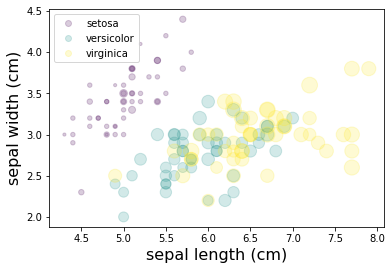

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
features = iris.data.T
print("Targets: ", iris.target_names)
print("Features:", iris.feature_names)


fig, ax = plt.subplots()
scat = ax.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
ax.set_xlabel(iris.feature_names[0], fontsize='16')
ax.set_ylabel(iris.feature_names[1], fontsize='16');
ax.legend(handles=scat.legend_elements()[0], labels=list(iris.target_names), loc='upper left');

Man kann einen scatter() Plot auch in 3 Dimensionen darstellen: 

Text(0.5, 0, 'petal length (cm)')

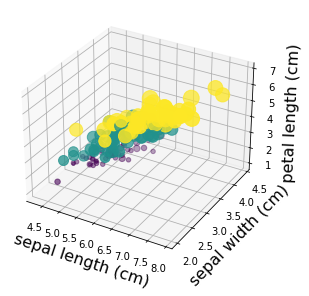

In [44]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(features[0],
           features[1],
           features[2],
           s=100*features[3],
           c=iris.target,
           cmap='viridis')
ax.set_xlabel(iris.feature_names[0], fontsize='16')
ax.set_ylabel(iris.feature_names[1], fontsize='16')
ax.set_zlabel(iris.feature_names[2], fontsize='16')

## 3D Plots

### Surface Plot
https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html?highlight=plot_surface#mpl_toolkits.mplot3d.Axes3D.plot_surface

Möchte man eine 3D Fläche darstellen, so wird für jeden Punkt in der zweidimensionalen XY-Ebene ein Punkt für die dazugehörige Höhe in Z benötigt. Man benötigt also ein Gitter mit Werten in der XY-Ebene, wobei die Z-Daten in jedem Punkt auf dem Gitter ausgerwertet werden. Um solche Daten zu erzeugen, eignet sich die Numpy-Funktion [np.meshgrid( )](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) besondern gut. 

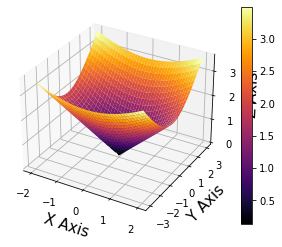

In [45]:
# Daten erzeugen
x = np.linspace(-2, 2, 41)
y = np.linspace(-3, 3, 61)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

# Daten darstellen
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_xlabel('X Axis', fontsize=15)
ax.set_ylabel('Y Axis', fontsize=15)
ax.set_zlabel('Z Axis', fontsize=15)
fig.colorbar(surf)

### contour()
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html

Konturdiagramme  sind eine Möglichkeit, eine dreidimensionale Fläche auf einer zweidimensionalen Ebene darzustellen. Sie stellen einen Querschnitt durch den dreidimensionalen Graphen Z = f(X, Y) parallel zur X, Y Ebene dar. Diese Konturen werden manchmal auch als Isolinien bezeichnet und werden beispielsweise in der Geographie oder Meteorologie eingesetzt.  Eine Konturlinie einer Funktion von zwei Variablen ist eine Kurve, entlang der die Funktion einen konstanten Wert hat. Die unabhängigen Variablen X und Y werden normalerweise auf ein regelmäßiges Gitter beschränkt. Die Funktion numpy.meshgrid() erzeugt ein rechteckiges Gitter aus einem Array von x-Werten und einem Array von y-Werten. Mit der contour() Funktion kann man Konturlinien und mit contourf() kann man gefüllte Konturen zeichnen. Beide Funktionen benötigen drei Parameter X, Y und Z. 

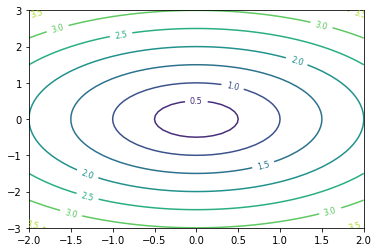

In [46]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-3, 3, 61)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots()
cont = ax.contour(X, Y, Z);
ax.clabel(cont, inline=True, fontsize=8);

### contourf()
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html

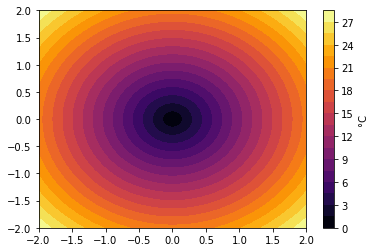

In [47]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)*10

fig, ax = plt.subplots()
cont = ax.contourf(X, Y, Z, 20, cmap='inferno');
cbar = fig.colorbar(cont);
cbar.ax.set_ylabel('°C');

### 3D Linienplot


Text(0.5, 0, 'Z Axis')

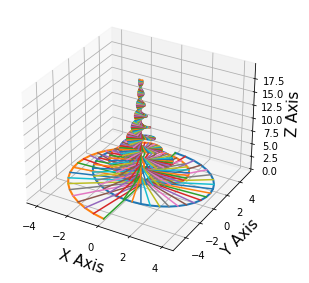

In [48]:
# Daten erzeugen
t = np.arange(0, 10, 0.05)
x1 = 5*np.sin(3*t)*np.exp(-0.4*t)
y1 = 5*np.cos(3*t)*np.exp(-0.4*t)
z1 = 2*t
x2 = -x1
y2 = -y1
z2 = z1

# Daten darstellen
fig = plt.figure(tight_layout=True)
ax = plt.axes(projection='3d')
ax.plot(x1, y1, z1, linewidth=2)
ax.plot(x2, y2, z2, linewidth=2)
for i in range(len(x1)):
    ax.plot([x2[i], x1[i]], [y2[i], y1[i]], [z2[i], z1[i]])
ax.set_xlabel('X Axis', fontsize=15)
ax.set_ylabel('Y Axis', fontsize=15)
ax.set_zlabel('Z Axis', fontsize=15)

### Praktisches Beispiel 

3D Darstellungen können helfen, um 3D-Sensordaten zu visualisieren. 
Im nachfolgenden Beispiel sieht man die Daten eines Magnetometers vor und nach dem Kalibrierungsalgorithmus. 

(-47.862, 47.862)

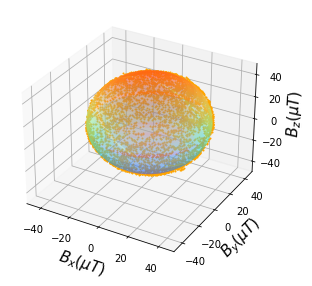

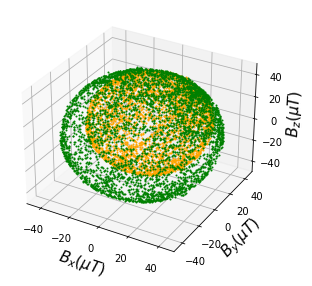

In [49]:
data = np.loadtxt("mag_data.txt", delimiter=",")
data_fit = np.loadtxt("fitted_data.txt", delimiter=",")
data_corr = np.loadtxt("corrected_data.txt", delimiter=",")

# fitted ellipsoid data has been flattened in order to be saved to txt file
# original data is given as three 2D arrays with size nxn
n = int(np.sqrt(len(data_fit[:, 1])))

# Show raw data and fitted ellipsoid
local_mag = 47.8620
fig = plt.figure(tight_layout=True)
ax = plt.axes(projection='3d')
ax.plot(data[:, 0],
          data[:, 1],
          data[:, 2], '.', label='raw data', color='orange', markersize=2)
ax.plot_surface(data_fit[:, 0].reshape(n, n),
                data_fit[:, 1].reshape(n, n),
                data_fit[:, 2].reshape(n, n),
                cmap='rainbow', alpha=0.2)
ax.set_xlabel(r'$B_x (\mu T)$', fontsize=15)
ax.set_ylabel(r'$B_y (\mu T)$', fontsize=15)
ax.set_zlabel(r'$B_z (\mu T)$', fontsize=15)
ax.set_xlim(-local_mag, local_mag)
ax.set_ylim(-local_mag, local_mag)
ax.set_zlim(-local_mag, local_mag)

fig = plt.figure(tight_layout=True)
ax = plt.axes(projection='3d')
ax.plot(data[:, 0],
          data[:, 1],
          data[:, 2], '.', label='raw data', color='orange', markersize=2)
ax.plot(data_corr[:, 0],
          data_corr[:, 1],
          data_corr[:, 2], '.', label='corrected data', color='green', markersize=2)
ax.set_xlabel(r'$B_x (\mu T)$', fontsize=15)
ax.set_ylabel(r'$B_y (\mu T)$', fontsize=15)
ax.set_zlabel(r'$B_z (\mu T)$', fontsize=15)
ax.set_xlim(-local_mag, local_mag)
ax.set_ylim(-local_mag, local_mag)
ax.set_zlim(-local_mag, local_mag)


### Plotting can be fun too

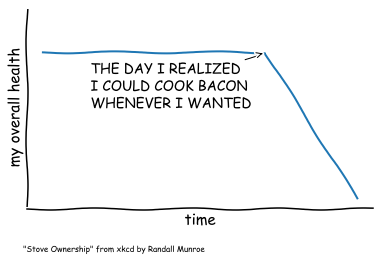

In [50]:
# https://xkcd.com/
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xkcd.html
# https://packages.debian.org/buster/fonts-humor-sans
# https://github.com/shreyankg/xkcd-desktop/blob/master/Humor-Sans.ttf
zeit = np.arange(7)
panik = np.exp(zeit)
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time', fontsize=15)
    ax.set_ylabel('my overall health', fontsize=15)
    fig.text(
        0.3, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center', fontsize=8)